# Bitcoin Ransomware Detection 

### Dataset from the UCI BitcoinHeistRansomwareAddressDataset Data Set available at http://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset

### Number of instances: 2916697
### Number of attributes: 10

### Attribute Information

### Features

#### address: String. Bitcoin address.

#### year: Integer. Year.

#### day: Integer. Day of the year. 1 is the first day, 365 is the last day.

#### length: Integer.Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

#### weight: Float. Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address.

#### count: Integer. Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactions is output) of transactions.

#### looped: Integer. Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. 

#### neighbors: Integer. (Not explained in dataset, but assumed to be number of network neighbors involved in the transaction) 

#### income: Integer. Satoshi amount (1 bitcoin = 100 million satoshis).

#### label: Category String. Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware).

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set_style("darkgrid")
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read BitcoinHeistData.csv file
df = pd.read_csv('BitcoinHeistData.csv')

In [3]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [4]:
# get descriptive statistics
print(df.describe())


               year           day        length        weight         count  \
count  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06   
mean   2.014475e+03  1.814572e+02  4.500859e+01  5.455192e-01  7.216446e+02   
std    2.257398e+00  1.040118e+02  5.898236e+01  3.674255e+00  1.689676e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.148438e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.819482e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income  
count  2.916697e+06  2.916697e+06  2.916697e+06  
mean   2.385067e+02  2.206516e+00  4.464889e+09  
std    9.663217e+02  1.791877e+01  1.626860e+11  
min    0.000000e+00  1.000000e+00  3.000000e+07  
25%    0.000000e+00  1.000000e+00  7.4

In [5]:
# get the shape of the dataframe
print(df.shape)

(2916697, 10)


In [6]:
# check for missing values
print(df.isnull().sum())

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [7]:
# drop date, year and address columns
df = df.drop(['year'], axis=1)
df = df.drop(['day'], axis=1)
df = df.drop(['address'], axis=1)

# Exploratory Data Analysis

In [8]:
# 1. Correlation matrix
corr = df.corr()
print(corr)

             length    weight     count    looped  neighbors    income
length     1.000000  0.000228  0.703467  0.411609   0.031523  0.000488
weight     0.000228  1.000000  0.022313  0.061646   0.691963  0.069774
count      0.703467  0.022313  1.000000  0.560370   0.025441 -0.003635
looped     0.411609  0.061646  0.560370  1.000000   0.052826  0.002551
neighbors  0.031523  0.691963  0.025441  0.052826   1.000000  0.138966
income     0.000488  0.069774 -0.003635  0.002551   0.138966  1.000000


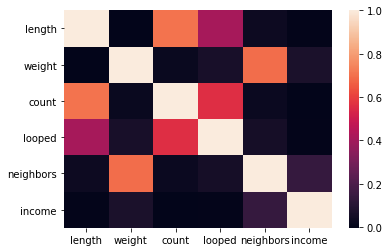

In [9]:
# 2. Heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [10]:
# #3. Pairplot
# sns.pairplot(df)
# plt.show()

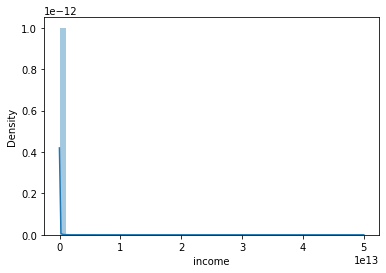

In [11]:
#4. Distribution of each feature
sns.distplot(df['income'])
plt.savefig("income-skewed")



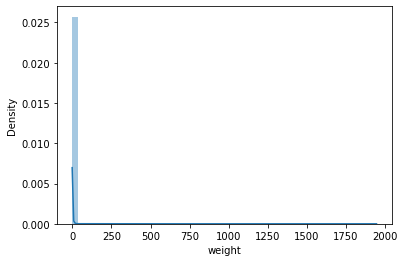

In [12]:
sns.distplot(df['weight'])
plt.savefig("weight-skewed")


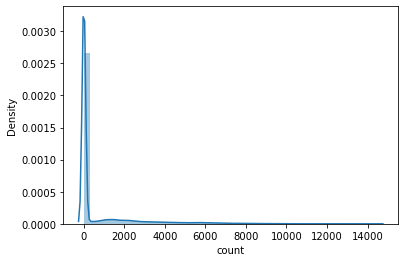

In [13]:
sns.distplot(df['count'])
plt.savefig("count-skewed")


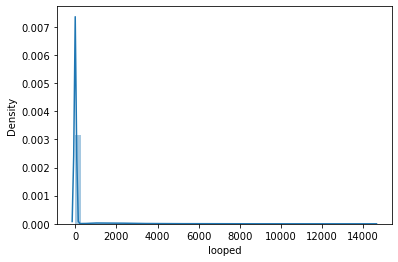

In [14]:
sns.distplot(df['looped'])
plt.savefig("looped-skewed")


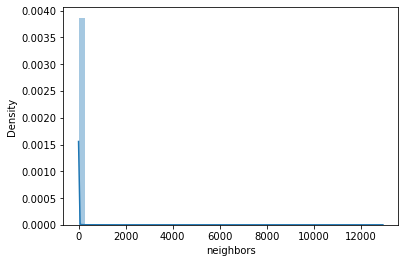

In [15]:
sns.distplot(df['neighbors'])
plt.savefig("neighbours-skewed")


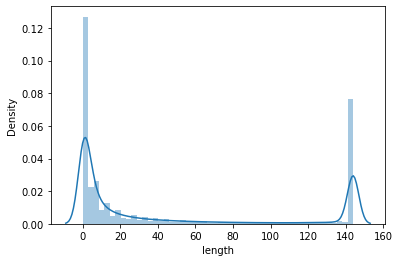

In [16]:
sns.distplot(df['length'])
plt.savefig("length-skewed")

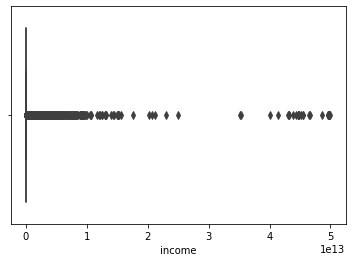

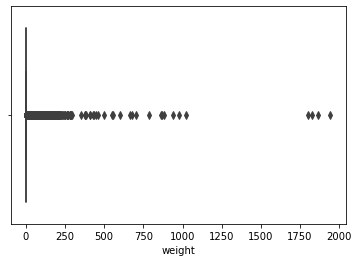

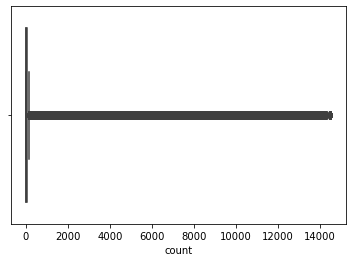

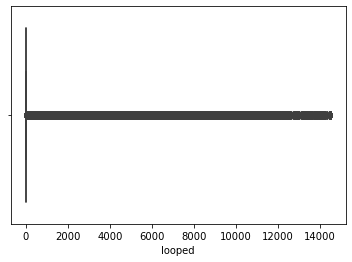

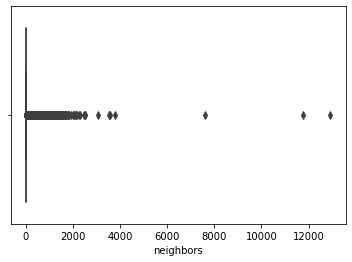

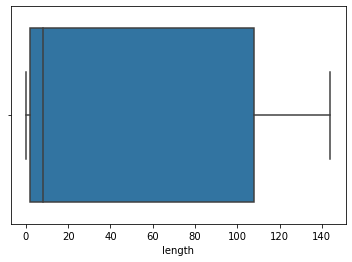

In [17]:
#5. Boxplot
sns.boxplot(df['income'])
plt.show()
sns.boxplot(df['weight'])
plt.show()
sns.boxplot(df['count'])
plt.show()
sns.boxplot(df['looped'])
plt.show()
sns.boxplot(df['neighbors'])
plt.show()
sns.boxplot(df['length'])
plt.show()

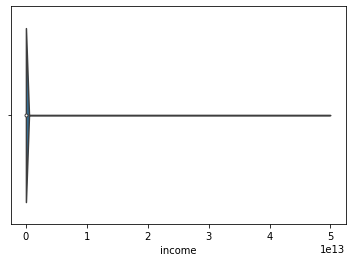

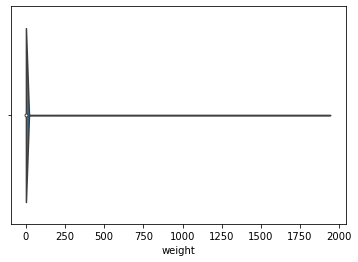

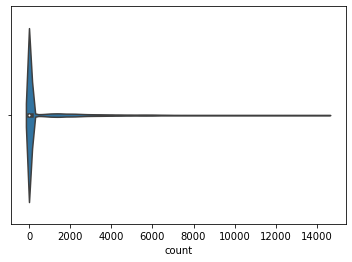

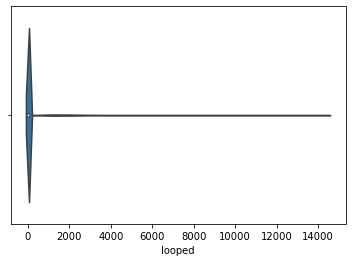

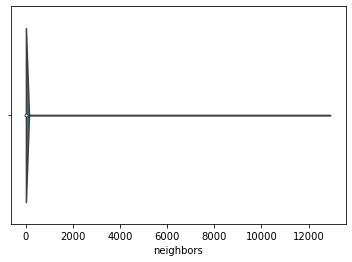

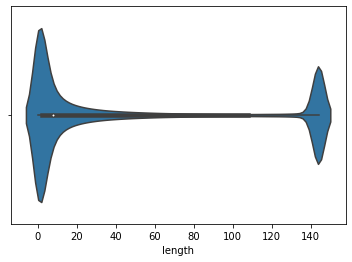

In [18]:
#6. Violin plot
sns.violinplot(df['income'])
plt.show()
sns.violinplot(df['weight'])
plt.show()
sns.violinplot(df['count'])
plt.show()
sns.violinplot(df['looped'])
plt.show()
sns.violinplot(df['neighbors'])
plt.show()
sns.violinplot(df['length'])
plt.show()

In [19]:
# #7. Swarm plot
# sns.swarmplot(df['income'])
# plt.show()
# sns.swarmplot(df['weight'])
# plt.show()
# sns.swarmplot(df['count'])
# plt.show()
# sns.swarmplot(df['looped'])
# plt.show()
# sns.swarmplot(df['neighbors'])
# plt.show()
# sns.swarmplot(df['length'])
# plt.show()

In [20]:
# #8. Pairplot with hue
# sns.pairplot(df, hue='label')
# plt.show()

In [21]:
print(df['label'].value_counts())

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [22]:
# show the % of each label
print(df['label'].value_counts(normalize=True)*100)

white                          98.580140
paduaCryptoWall                 0.424796
montrealCryptoLocker            0.319368
princetonCerber                 0.316214
princetonLocky                  0.227140
montrealCryptXXX                0.082936
montrealNoobCrypt               0.016560
montrealDMALockerv3             0.012137
montrealDMALocker               0.008606
montrealSamSam                  0.002126
montrealCryptoTorLocker2015     0.001886
montrealGlobeImposter           0.001886
montrealGlobev3                 0.001166
montrealGlobe                   0.001097
montrealWannaCry                0.000960
montrealRazy                    0.000446
montrealAPT                     0.000377
paduaKeRanger                   0.000343
montrealFlyper                  0.000309
montrealXTPLocker               0.000274
montrealXLockerv5.0             0.000240
montrealVenusLocker             0.000240
montrealCryptConsole            0.000240
montrealEDA2                    0.000206
montrealJigSaw  

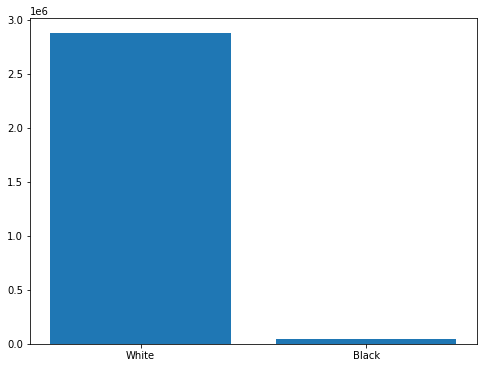

In [23]:
# show the barchart of white label vs rest of the labels treated as black
label_white = []
label_black = []
for element in df.label:
    if element == 'white':
        label_white.append(element)
    else:
        label_black.append(element)

x_ax = ['White','Black']
y_ax = [len(label_white),len(label_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
plt.savefig("imbalaced")

In [24]:
# make left skewed data to normal distribution
df['income'] = np.log(df['income'])
df['weight'] = np.log(df['weight'])
df['count'] = np.log(df['count'])
df['looped'] = np.log(df['looped'])
df['neighbors'] = np.log(df['neighbors'])
df['length'] = np.log(df['length'])

In [25]:
# drop nan values
df = df.dropna()
# drop inf rows
df = df[np.isfinite(df['income'])]
df = df[np.isfinite(df['weight'])]
df = df[np.isfinite(df['count'])]
df = df[np.isfinite(df['looped'])]
df = df[np.isfinite(df['neighbors'])]
df = df[np.isfinite(df['length'])]

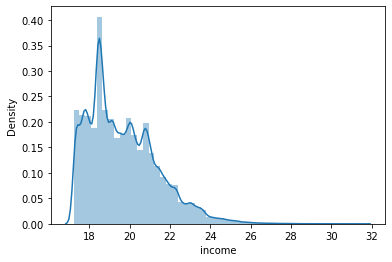

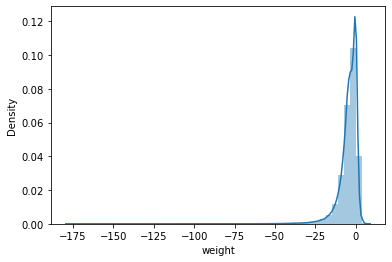

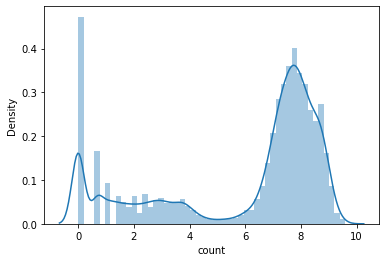

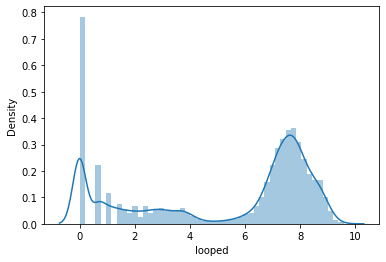

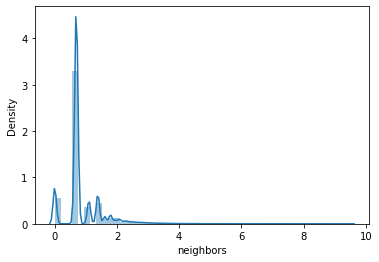

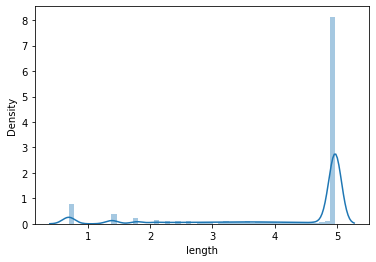

In [26]:
# distribution of each feature
sns.distplot(df['income'])
plt.show()
sns.distplot(df['weight'])
plt.show()
sns.distplot(df['count'])
plt.show()
sns.distplot(df['looped'])
plt.show()
sns.distplot(df['neighbors'])
plt.show()
sns.distplot(df['length'])
plt.show()

             length    weight     count    looped  neighbors    income
length     1.000000 -0.210142  0.862473  0.711326  -0.105312 -0.137254
weight    -0.210142  1.000000 -0.039754 -0.141708   0.248401  0.227163
count      0.862473 -0.039754  1.000000  0.819876  -0.083986 -0.138381
looped     0.711326 -0.141708  0.819876  1.000000  -0.055417 -0.130386
neighbors -0.105312  0.248401 -0.083986 -0.055417   1.000000  0.436366
income    -0.137254  0.227163 -0.138381 -0.130386   0.436366  1.000000


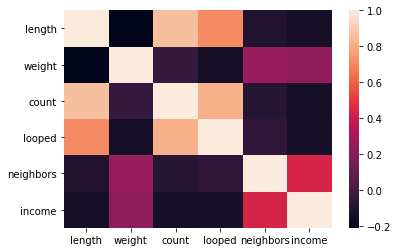

In [27]:
# correlation matrix
corr = df.corr()
print(corr)

# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


In [28]:
# convert label to categorical
df['label'] = df['label'].astype('category')
# make a copy of the dataframe
df_copy = df.copy()
# perform get_dummies on label
label_encode = pd.get_dummies(df_copy.label)
label_encode.white

27         0
33         0
98         0
109        0
121        0
          ..
2916667    1
2916668    1
2916680    1
2916688    1
2916694    1
Name: white, Length: 411820, dtype: uint8

In [29]:
# make a new column called 'label_encoded' in df
df['label_encoded'] = label_encode.white
# drop label column
df = df.drop(['label'], axis=1)
# reset index
df = df.reset_index(drop=True)
# get top 5 rows of the dataframe
print(df.head())

     length    weight     count    looped  neighbors     income  label_encoded
0  2.079442 -4.969813  0.000000  0.000000   0.693147  18.197537              0
1  4.969813  0.474460  8.631414  8.096513   0.693147  18.941377              0
2  2.484907 -9.939627  0.000000  0.000000   0.693147  18.197537              0
3  4.969813  1.299378  7.719130  0.693147   1.791759  19.304364              0
4  4.969813 -0.631770  7.579679  7.080868   0.000000  18.323068              0


                 length    weight     count    looped  neighbors    income  \
length         1.000000 -0.210142  0.862473  0.711326  -0.105312 -0.137254   
weight        -0.210142  1.000000 -0.039754 -0.141708   0.248401  0.227163   
count          0.862473 -0.039754  1.000000  0.819876  -0.083986 -0.138381   
looped         0.711326 -0.141708  0.819876  1.000000  -0.055417 -0.130386   
neighbors     -0.105312  0.248401 -0.083986 -0.055417   1.000000  0.436366   
income        -0.137254  0.227163 -0.138381 -0.130386   0.436366  1.000000   
label_encoded -0.003564 -0.058076  0.006606  0.046502  -0.035840 -0.029765   

               label_encoded  
length             -0.003564  
weight             -0.058076  
count               0.006606  
looped              0.046502  
neighbors          -0.035840  
income             -0.029765  
label_encoded       1.000000  


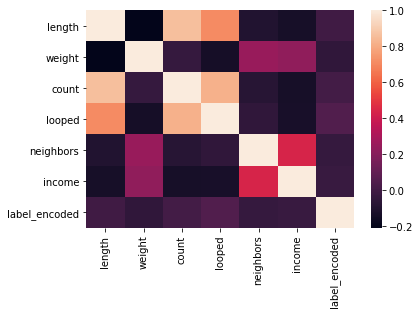

In [30]:
# corelation matrix
corr = df.corr()
print(corr)
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [31]:
# if neighbours is greater than log(2) then encode it as 0 else encode it as 1
df['neighbors'] = np.where(df['neighbors'] > np.log(2), 0, 1)
# if length is greater than log(8) then encode it as 0 else encode it as 1
df['length'] = np.where(df['length'] > np.log(8), 0, 1)
# if count is greater than log(1) then encode it as 0 else encode it as 1
df['count'] = np.where(df['count'] > np.log(1), 0, 1)
# if looped is greater than log(1) then encode it as 0 else encode it as 1
df['looped'] = np.where(df['looped'] > np.log(1), 0, 1)

                 length    weight     count    looped  neighbors    income  \
length         1.000000  0.217567  0.538111  0.456616  -0.205443  0.098541   
weight         0.217567  1.000000  0.025393  0.107448  -0.330412  0.227163   
count          0.538111  0.025393  1.000000  0.751016  -0.119753  0.102171   
looped         0.456616  0.107448  0.751016  1.000000  -0.153561  0.100278   
neighbors     -0.205443 -0.330412 -0.119753 -0.153561   1.000000 -0.353924   
income         0.098541  0.227163  0.102171  0.100278  -0.353924  1.000000   
label_encoded  0.001650 -0.058076  0.002793 -0.027589   0.060872 -0.029765   

               label_encoded  
length              0.001650  
weight             -0.058076  
count               0.002793  
looped             -0.027589  
neighbors           0.060872  
income             -0.029765  
label_encoded       1.000000  


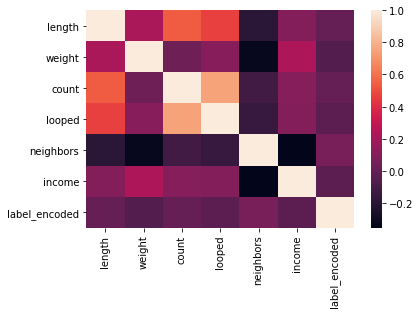

In [32]:
# corelation matrix
corr = df.corr()
print(corr)
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [33]:
# #8. Pairplot with hue
# sns.pairplot(df, hue='label_encoded')
# plt.show()

In [34]:
# scale the except the label encoded column
df_copy = df.copy()
# scaler = StandardScaler()
# drop label column
df_copy = df_copy.drop(['label_encoded'], axis=1)
# fit the scaler
# scaler.fit(df_copy)
# transform the data
# df_copy = scaler.transform(df_copy)
# add the label encoded column back
df_copy = pd.concat([pd.DataFrame(df_copy), df['label_encoded']], axis=1)
# reset index
df_copy = df_copy.reset_index(drop=True)
# rename the columns
df_copy.columns = ['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label_encoded']
# get top 5 rows of the dataframe
print(df_copy.head())

   length    weight  count  looped  neighbors     income  label_encoded
0       1 -4.969813      1       1          1  18.197537              0
1       0  0.474460      0       0          1  18.941377              0
2       0 -9.939627      1       1          1  18.197537              0
3       0  1.299378      0       0          0  19.304364              0
4       0 -0.631770      0       0          1  18.323068              0


In [35]:
# since majority of labels are white we need to balance the dataset
# create a new dataframe with only white label
df_white = df_copy[df_copy['label_encoded'] == 1]
# create a new dataframe with only black label
df_black = df_copy[df_copy['label_encoded'] == 0]
# get the number of rows in each dataframe
white_count = len(df_white)
black_count = len(df_black)

# get the number of rows to be removed
remove_count = white_count - black_count
# get the index of the rows to be removed
remove_index = df_white.sample(remove_count).index
# drop the rows
df_white = df_white.drop(remove_index)

# merge the two dataframes
df_balanced = pd.concat([df_white, df_black], axis=0)
# reset index
df_balanced = df_balanced.reset_index(drop=True)
# get top 5 rows of the dataframe
print(df_balanced.head())

   length    weight  count  looped  neighbors     income  label_encoded
0       0  0.508088      0       0          0  21.225858              1
1       0  0.678390      0       1          0  21.664444              1
2       0 -0.025806      0       1          1  19.227157              1
3       1 -0.693147      1       1          1  21.555305              1
4       0 -0.665587      0       0          1  18.119576              1


1    50.0
0    50.0
Name: label_encoded, dtype: float64


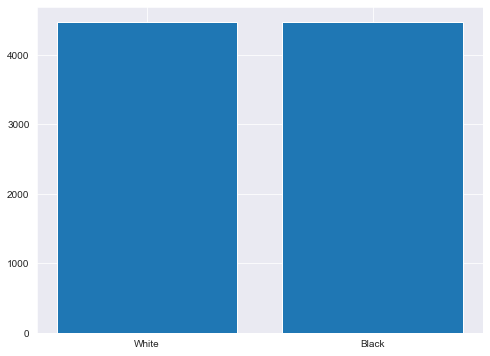

In [107]:
# check if the dataframe is balanced
print(df_balanced['label_encoded'].value_counts(normalize=True)*100)

bw_white = []
bw_black = []
for element in df_balanced.label_encoded:
    if element == 1:
        bw_white.append(element)
    else:
        bw_black.append(element)

x_ax = ['White','Black']
y_ax = [len(bw_white),len(bw_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
plt.savefig("balanced.png")

                 length    weight     count    looped  neighbors    income  \
length         1.000000  0.129151  0.504844  0.393614  -0.102527  0.002023   
weight         0.129151  1.000000 -0.058008  0.051503  -0.354723  0.262203   
count          0.504844 -0.058008  1.000000  0.617651  -0.025202 -0.025436   
looped         0.393614  0.051503  0.617651  1.000000  -0.092533 -0.000842   
neighbors     -0.102527 -0.354723 -0.025202 -0.092533   1.000000 -0.426720   
income         0.002023  0.262203 -0.025436 -0.000842  -0.426720  1.000000   
label_encoded  0.003684 -0.328545  0.008801 -0.119565   0.267234 -0.164891   

               label_encoded  
length              0.003684  
weight             -0.328545  
count               0.008801  
looped             -0.119565  
neighbors           0.267234  
income             -0.164891  
label_encoded       1.000000  


<AxesSubplot:>

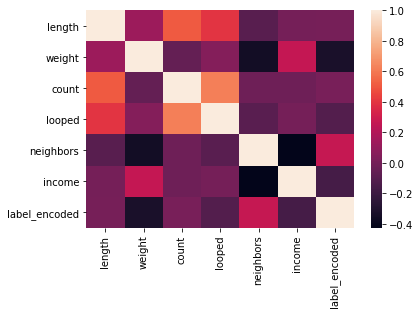

In [37]:
# corelation matrix
corr = df_balanced.corr()
print(corr)
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [38]:
# split the dataframe into train and test
X = df_balanced.drop(['label_encoded'], axis=1)
y = df_balanced['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler
scaler.fit(X_train)
# transform the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# scale the data by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler()
# fit the scaler
scaler3.fit(X_train)
# transform the data
X_train = scaler3.transform(X_train)
X_test = scaler3.transform(X_test)

# scale the data by RobustScaler
from sklearn.preprocessing import RobustScaler
# scale the data
scaler2 = RobustScaler()
# fit the scaler
scaler2.fit(X_train)
# transform the data
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)


In [39]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
# create a logistic regression model
log_reg = LogisticRegression()
# fit the model
log_reg.fit(X_train, y_train)
# predict the labels
y_pred = log_reg.predict(X_test)
# get the accuracy score
print(log_reg.score(X_test, y_test))

0.6925656791503634


In [40]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[682 211]
 [339 557]]


In [41]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       893
           1       0.73      0.62      0.67       896

    accuracy                           0.69      1789
   macro avg       0.70      0.69      0.69      1789
weighted avg       0.70      0.69      0.69      1789



In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.62
Precision Score: 0.73
F1 Score: 0.67
Accuracy Score: 0.69


In [43]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6926847954327306


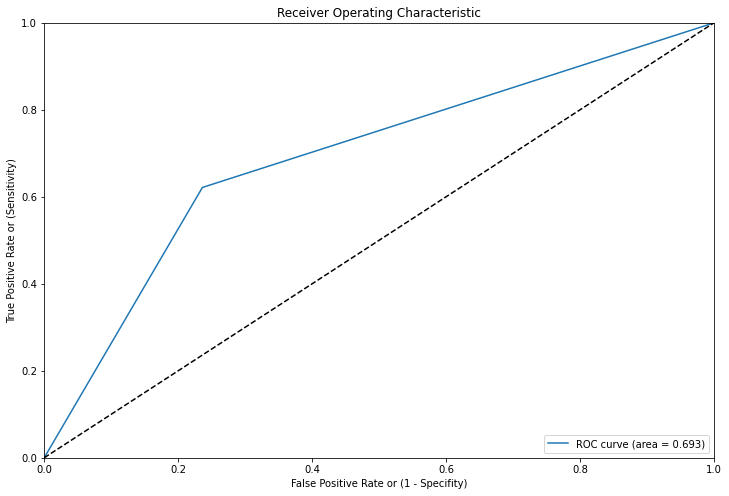

In [44]:
# get the roc curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc1 = roc_auc_score(y_test, y_pred)
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.3f)' % roc1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [45]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
# create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(X_train, y_train)
# predict the labels
y_pred = knn.predict(X_test)
# get the accuracy score
print(knn.score(X_test, y_test))

0.7177193963107882


In [46]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[670 223]
 [282 614]]


In [47]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       893
           1       0.73      0.69      0.71       896

    accuracy                           0.72      1789
   macro avg       0.72      0.72      0.72      1789
weighted avg       0.72      0.72      0.72      1789



In [48]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.69
Precision Score: 0.73
F1 Score: 0.71
Accuracy Score: 0.72


In [49]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.717773906175012


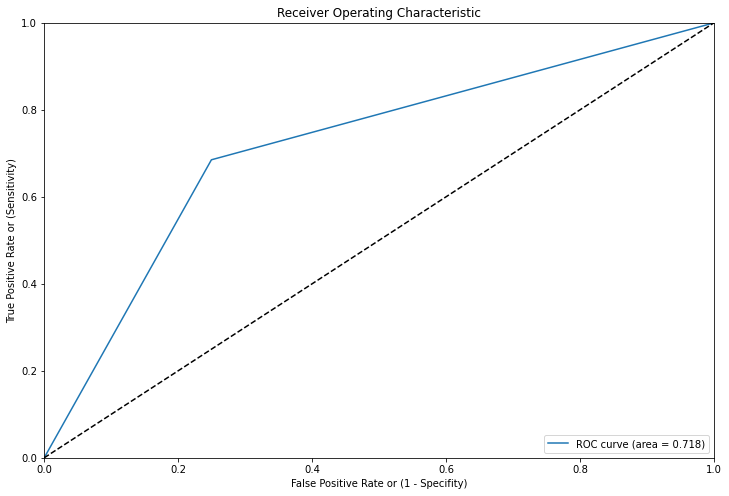

In [50]:
# get the roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc2 = roc_auc_score(y_test, y_pred)
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc2)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [51]:
# support vector machine model
from sklearn.svm import SVC
# create a SVM model
svm = SVC(kernel='rbf', gamma=0.1, C=1)
# fit the model
svm.fit(X_train, y_train)
# predict the labels
y_pred = svm.predict(X_test)
# get the accuracy score
print(svm.score(X_test, y_test))

0.7210732252655114


In [52]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[747 146]
 [353 543]]


In [53]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       893
           1       0.79      0.61      0.69       896

    accuracy                           0.72      1789
   macro avg       0.73      0.72      0.72      1789
weighted avg       0.73      0.72      0.72      1789



In [54]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.61
Precision Score: 0.79
F1 Score: 0.69
Accuracy Score: 0.72


In [55]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7212664723644217


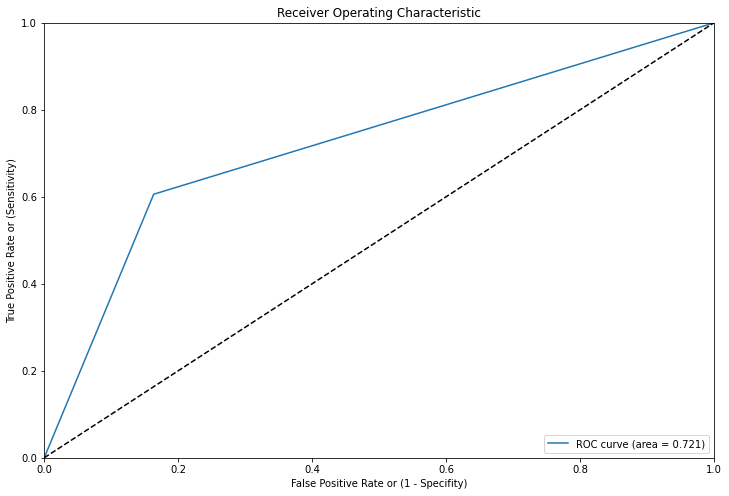

In [56]:
# get the roc curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc3 = roc_auc_score(y_test, y_pred)
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.3f)' % roc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [57]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# create a decision tree model
dec_tree = DecisionTreeClassifier()
# fit the model
dec_tree.fit(X_train, y_train)
# predict the labels
y_pred = dec_tree.predict(X_test)
# get the accuracy score
print(dec_tree.score(X_test, y_test))

0.670206819452208


In [58]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[586 307]
 [283 613]]


In [59]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       893
           1       0.67      0.68      0.68       896

    accuracy                           0.67      1789
   macro avg       0.67      0.67      0.67      1789
weighted avg       0.67      0.67      0.67      1789



In [60]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.68
Precision Score: 0.67
F1 Score: 0.68
Accuracy Score: 0.67


In [61]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6701833956566948


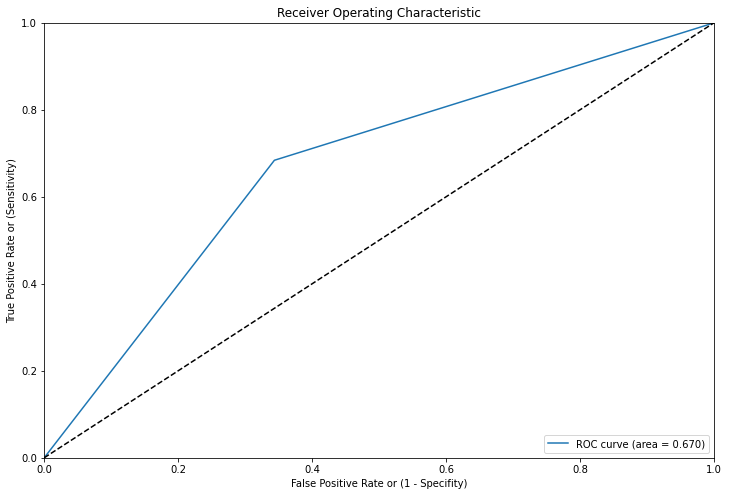

In [62]:
# get the roc curve
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc4 = roc_auc_score(y_test, y_pred)
plt.plot(fpr4, tpr4, label='ROC curve (area = %0.3f)' % roc4)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [63]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# create a random forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100)
# fit the model
rf.fit(X_train, y_train)
# predict the labels
y_pred = rf.predict(X_test)
# get the accuracy score
print(rf.score(X_test, y_test))

0.7193963107881498


In [64]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[663 230]
 [272 624]]


In [65]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       893
           1       0.73      0.70      0.71       896

    accuracy                           0.72      1789
   macro avg       0.72      0.72      0.72      1789
weighted avg       0.72      0.72      0.72      1789



In [66]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.70
Precision Score: 0.73
F1 Score: 0.71
Accuracy Score: 0.72


In [67]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7194348904175332


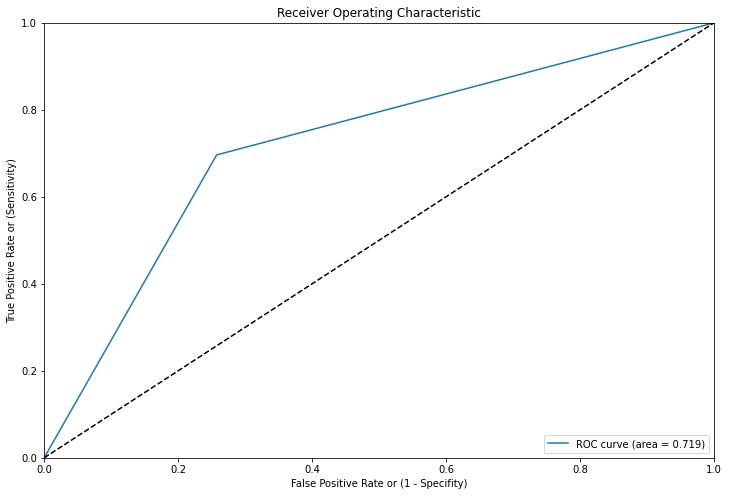

In [68]:
# get the roc curve
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc5 = roc_auc_score(y_test, y_pred)
plt.plot(fpr5, tpr5, label='ROC curve (area = %0.3f)' % roc5)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [69]:
# adaboost model
from sklearn.ensemble import AdaBoostClassifier
# create a adaboost model with 100 trees
ada = AdaBoostClassifier(n_estimators=100)
# fit the model
ada.fit(X_train, y_train)
# predict the labels
y_pred = ada.predict(X_test)
# get the accuracy score
print(ada.score(X_test, y_test))

0.7266629401900503


In [70]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[728 165]
 [324 572]]


In [71]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       893
           1       0.78      0.64      0.70       896

    accuracy                           0.73      1789
   macro avg       0.73      0.73      0.72      1789
weighted avg       0.73      0.73      0.72      1789



In [72]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.64
Precision Score: 0.78
F1 Score: 0.70
Accuracy Score: 0.73


In [73]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7268112102063671


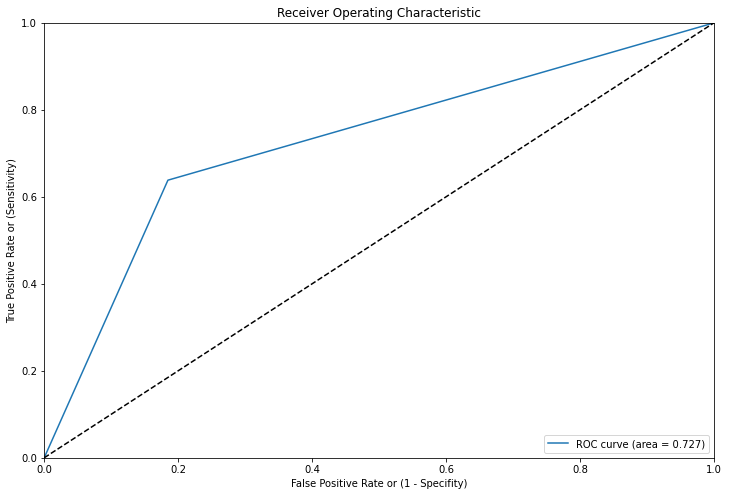

In [74]:
# get the roc curve
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc6 = roc_auc_score(y_test, y_pred)
plt.plot(fpr6, tpr6, label='ROC curve (area = %0.3f)' % roc6)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [75]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
# create a gradient boosting model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100)
# fit the model
gb.fit(X_train, y_train)
# predict the labels
y_pred = gb.predict(X_test)
# get the accuracy score
print(gb.score(X_test, y_test))

0.7395192845164896


In [76]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[737 156]
 [310 586]]


In [77]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       893
           1       0.79      0.65      0.72       896

    accuracy                           0.74      1789
   macro avg       0.75      0.74      0.74      1789
weighted avg       0.75      0.74      0.74      1789



In [78]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.65
Precision Score: 0.79
F1 Score: 0.72
Accuracy Score: 0.74


In [79]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7396629039353704


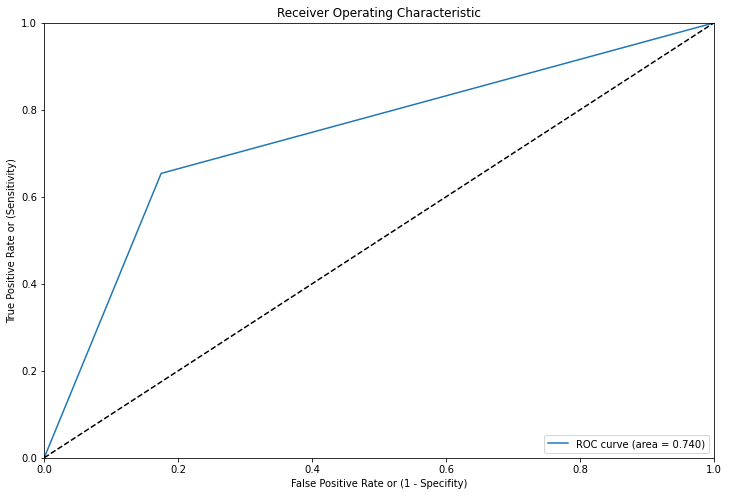

In [80]:
# get the roc curve
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc7 = roc_auc_score(y_test, y_pred)
plt.plot(fpr7, tpr7, label='ROC curve (area = %0.3f)' % roc7)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [81]:
# Artificial Neural Network model
from sklearn.neural_network import MLPClassifier
# create a neural network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
# fit the model
nn.fit(X_train, y_train)
# predict the labels
y_pred = nn.predict(X_test)
# get the accuracy score
print(nn.score(X_test, y_test))

0.7411961989938514


In [82]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[720 173]
 [290 606]]


In [83]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       893
           1       0.78      0.68      0.72       896

    accuracy                           0.74      1789
   macro avg       0.75      0.74      0.74      1789
weighted avg       0.75      0.74      0.74      1789



In [84]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.68
Precision Score: 0.78
F1 Score: 0.72
Accuracy Score: 0.74


In [85]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7413051411774115


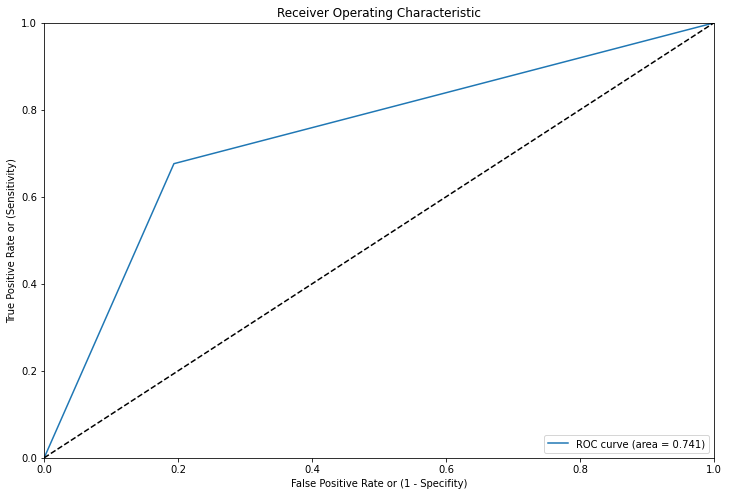

In [86]:
# get the roc curve
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc8 = roc_auc_score(y_test, y_pred)
plt.plot(fpr8, tpr8, label='ROC curve (area = %0.3f)' % roc8)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [87]:
# Artificial Neural Network model with multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# create a multi-layer perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
# fit the model
mlp.fit(X_train, y_train)
# predict the labels
y_pred = mlp.predict(X_test)
# get the accuracy score
print(mlp.score(X_test, y_test))

0.7417551704863052


In [88]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[714 179]
 [283 613]]


In [89]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       893
           1       0.77      0.68      0.73       896

    accuracy                           0.74      1789
   macro avg       0.75      0.74      0.74      1789
weighted avg       0.75      0.74      0.74      1789



In [90]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.68
Precision Score: 0.77
F1 Score: 0.73
Accuracy Score: 0.74


In [91]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7418519286914094


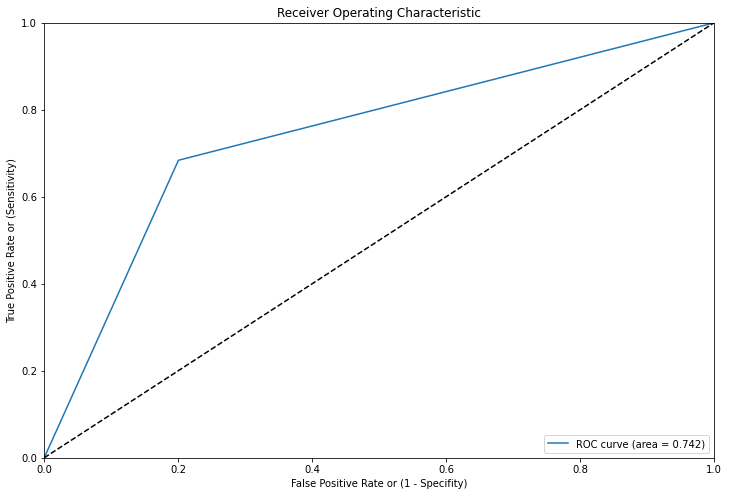

In [92]:
# get the roc curve
fpr9, tpr9, thresholds9 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc9 = roc_auc_score(y_test, y_pred)
plt.plot(fpr9, tpr9, label='ROC curve (area = %0.3f)' % roc9)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [93]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       893
           1       0.77      0.68      0.73       896

    accuracy                           0.74      1789
   macro avg       0.75      0.74      0.74      1789
weighted avg       0.75      0.74      0.74      1789



In [94]:
#keras Neural Network with 5 hidden layers with 'relu' activation function and adam optimizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
model = Sequential()
model.add(Dense(units=128, activation='relu', kernel_initializer='normal', input_dim=6))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10)
# predict the labels
y_pred = model.predict(X_test)

Epoch 1/100


2021-11-04 20:07:55.486371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-04 20:07:55.582559: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


716/716 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6845
Epoch 2/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7267
Epoch 3/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7209
Epoch 4/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7304
Epoch 5/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7145
Epoch 6/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7242
Epoch 7/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7401
Epoch 8/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7351
Epoch 9/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7315
Epoch 10/100
716/716 [==============================] - 1s 1ms/step - loss: 0.5147 - accuracy: 0.7542
E

In [95]:
# get the accuracy score
print(model.evaluate(X_test, y_test))

56/56 [==============================] - 0s 577us/step - loss: 0.5294 - accuracy: 0.7429
[0.5294172167778015, 0.7428731322288513]


In [96]:
# convert y_pred to binary
y_pred = (y_pred > 0.5)

In [97]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[741 152]
 [308 588]]


In [98]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       893
           1       0.79      0.66      0.72       896

    accuracy                           0.74      1789
   macro avg       0.75      0.74      0.74      1789
weighted avg       0.75      0.74      0.74      1789



In [99]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.66
Precision Score: 0.79
F1 Score: 0.72
Accuracy Score: 0.74


In [100]:


# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7430186170212766


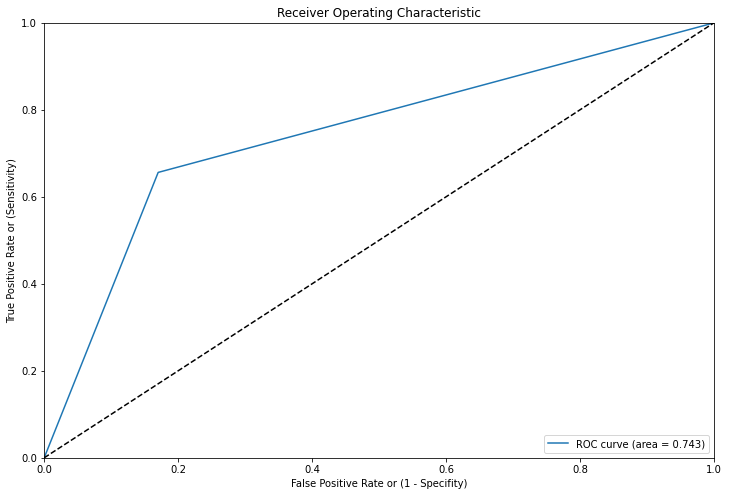

In [101]:
# plot roc curve
# get the roc curve
fpr10, tpr10, thresholds10 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc10 = roc_auc_score(y_test, y_pred)
plt.plot(fpr10, tpr10, label='ROC curve (area = %0.3f)' % roc10)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

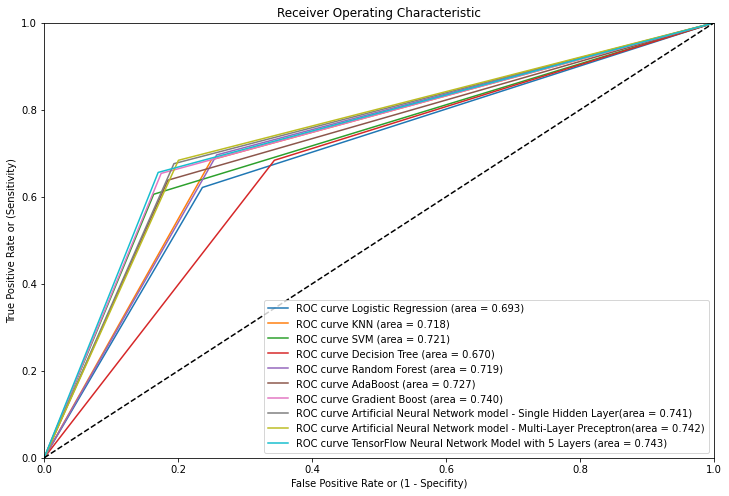

In [103]:
plt.figure(figsize = (12,8))
roc10 = roc_auc_score(y_test, y_pred)
plt.plot(fpr1, tpr1, label='ROC curve Logistic Regression (area = %0.3f)' % roc1)
plt.plot(fpr2, tpr2, label='ROC curve KNN (area = %0.3f)' % roc2)
plt.plot(fpr3, tpr3, label='ROC curve SVM (area = %0.3f)' % roc3)
plt.plot(fpr4, tpr4, label='ROC curve Decision Tree (area = %0.3f)' % roc4)
plt.plot(fpr5, tpr5, label='ROC curve Random Forest (area = %0.3f)' % roc5)
plt.plot(fpr6, tpr6, label='ROC curve AdaBoost (area = %0.3f)' % roc6)
plt.plot(fpr7, tpr7, label='ROC curve Gradient Boost (area = %0.3f)' % roc7)
plt.plot(fpr8, tpr8, label='ROC curve Artificial Neural Network model - Single Hidden Layer(area = %0.3f)' % roc8)
plt.plot(fpr9, tpr9, label='ROC curve Artificial Neural Network model - Multi-Layer Preceptron(area = %0.3f)' % roc9)
plt.plot(fpr10, tpr10, label='ROC curve TensorFlow Neural Network Model with 5 Layers (area = %0.3f)' % roc10)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig("roc-curves.png")
